In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

In [2]:
# Create a date range at 15 minute intervals for one day
date_range = pd.date_range(start='2023-01-01 00:00:00', end='2023-02-20 23:45:00', freq='15min')

# Create a dictionary to store the columns
columns = {'Datetime': date_range}

# Create 98 additional columns with random integer values between 1 and 100
for i in range(0, 220):
    column_name = 'CRR' + str(i)
    values = np.random.choice([0, np.random.randint(1, 10000)], size=len(date_range), p=[0.98, 0.02])
    columns[column_name] = values

# Create a DataFrame with the time series column and the additional value columns
df = pd.DataFrame(columns)
df.insert(1, 'Date', df['Datetime'].dt.strftime('%Y-%m-%d'))
df.head(1)

,Datetime,Date,CRR0,CRR1,CRR2,CRR3,CRR4,CRR5,CRR6,CRR7,...,CRR210,CRR211,CRR212,CRR213,CRR214,CRR215,CRR216,CRR217,CRR218,CRR219
0,2023-01-01,2023-01-01,0,0,0,0,0,0,0,0,...,0,0,0,6925,0,0,0,0,0,0


----- 5.06 seconds in total -----


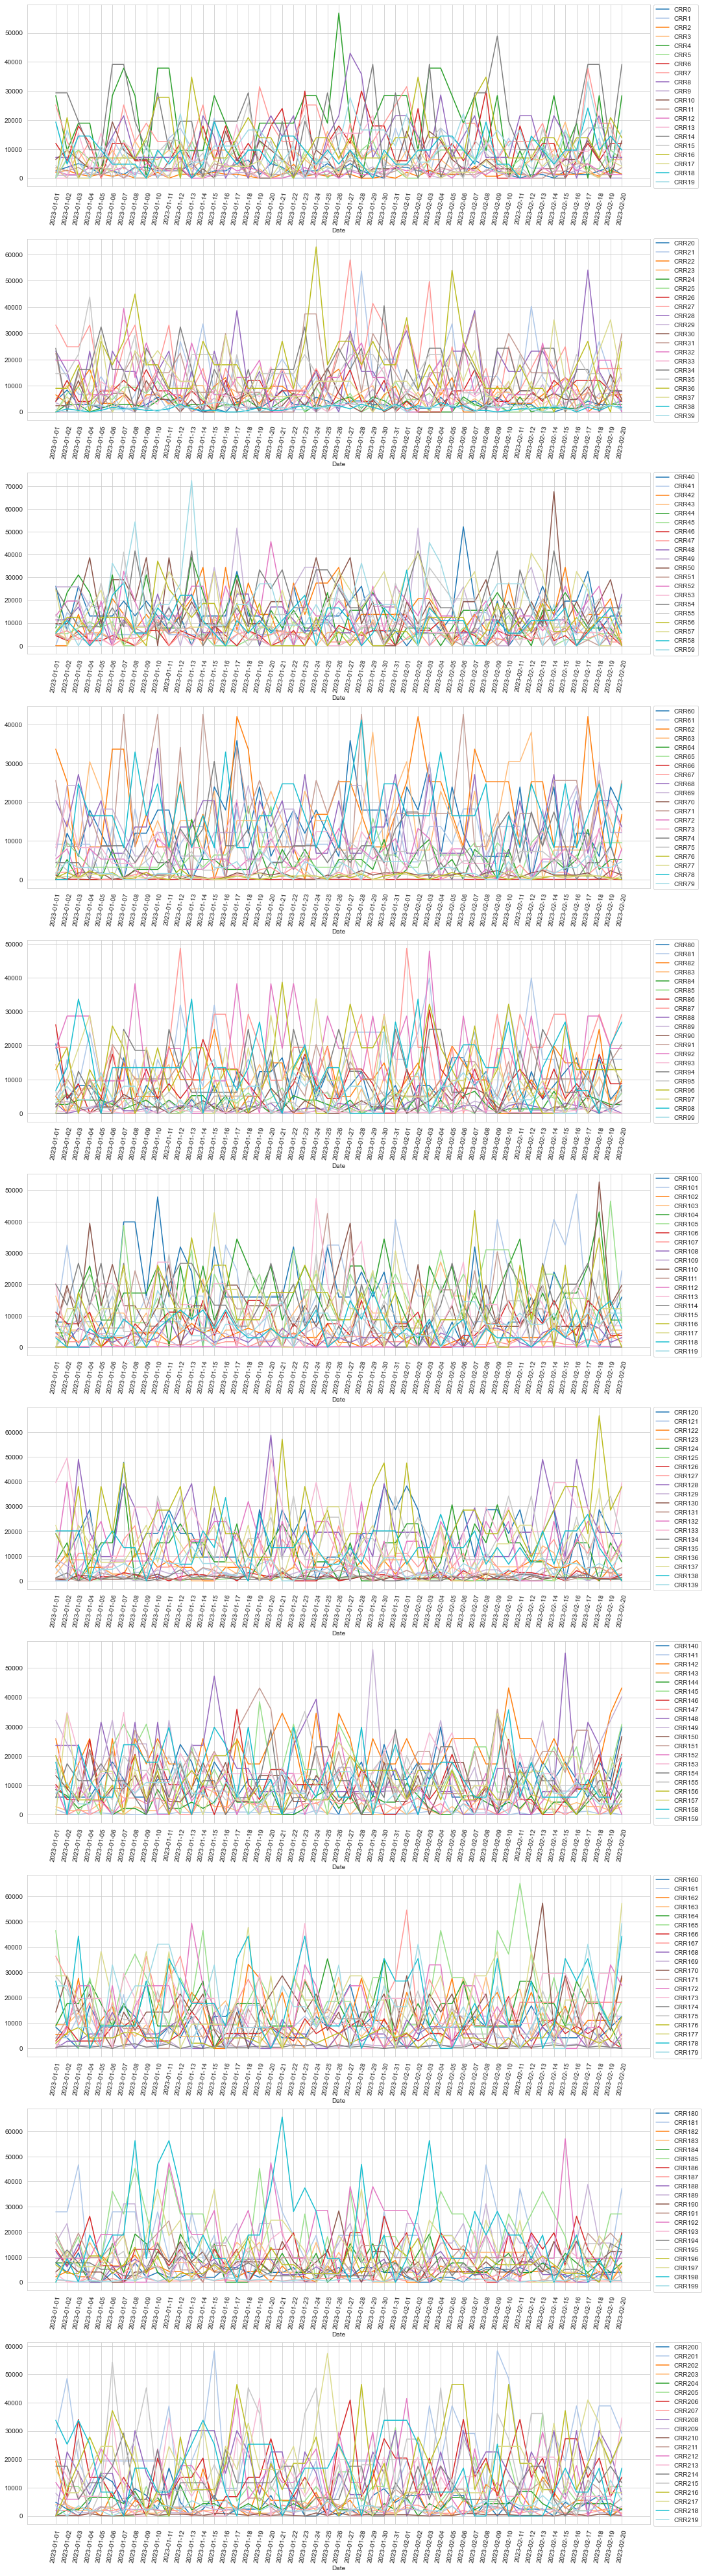

In [3]:
start_time = time.time()
plt.set_loglevel('WARNING') 
sns.set_style('whitegrid')
sns.set_palette('tab20')

start_idx = df.columns.get_loc('CRR0')
last_idx = len(df.columns)+1

total_ax = math.ceil((last_idx-1-start_idx)/20)

fig, axes = plt.subplots(total_ax, 1, figsize=(15, total_ax*5), sharex=False, constrained_layout=True)

for i, j in zip(range(total_ax), range(start_idx, last_idx, 20)):
    for row, col in enumerate(df.columns[j:j+20]):
        sns.lineplot(ax=axes[i], data=df, x='Date', y=col, estimator=np.sum, label=col, ci=None)

for ax in axes:
    ax.set_ylabel('')
    ax.tick_params('x', labelrotation=80)
    ax.legend(bbox_to_anchor=(1, 1.02), ncol=1, loc=2);

print('----- %s seconds in total -----' % round((time.time() - start_time), 2))